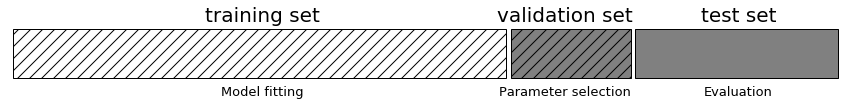

In [3]:
import mglearn
import matplotlib as plt
% matplotlib inline

mglearn.plots.plot_threefold_split()

In [6]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}
print("Parametergitter:\n{}".format(param_grid))

Parametergitter:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [10]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [11]:
print("Genauigkeit auf den Testdaten: {:.2f}".format(grid_search.score(X_test, y_test)))

Genauigkeit auf den Testdaten: 0.97


In [12]:
print("Beste Parameter: {}".format(grid_search.best_params_))
print("Beste Genauigkeit aus der Kreuzvalidierung: {:.2f}".format(grid_search.best_score_))

Beste Parameter: {'C': 100, 'gamma': 0.01}
Beste Genauigkeit aus der Kreuzvalidierung: 0.97


In [13]:
import pandas as pd

results = pd.DataFrame(grid_search.cv_results_)
results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.002112,0.000850,0.366071,0.366079,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000333,0.000145,0.011371,0.002852
1,0.001862,0.000800,0.366071,0.366079,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000043,0.000037,0.011371,0.002852
2,0.001859,0.000766,0.366071,0.366079,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000063,0.000031,0.011371,0.002852
3,0.001500,0.000582,0.366071,0.366079,0.001,1,"{'C': 0.001, 'gamma': 1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000138,0.000083,0.011371,0.002852
4,0.001671,0.000564,0.366071,0.366079,0.001,10,"{'C': 0.001, 'gamma': 10}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000152,0.000164,0.011371,0.002852
